Refer to TextClassificationCNN for preprocessing details

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.6.0'

In [3]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df=pd.read_csv('spam.csv',error_bad_lines=False,encoding= 'Windows-1252')
X=df['v2']
y=df['v1'].apply(lambda x:0 if x=='spam' else 1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

C:\Users\AbhijitShingote\.conda\envs\tf2.6_092021\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
num_words=None
embedding_length=20
tok=Tokenizer(num_words=num_words)
tok.fit_on_texts(X_train)
X_train=tok.texts_to_sequences(X_train)
X_test=tok.texts_to_sequences(X_test)
X_train=pad_sequences(X_train)
X_test=pad_sequences(X_test,maxlen=X_train.shape[1])
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [6]:
maxsequencelength=X_train.shape[1]
maxsequencelength

189

In [7]:
X_train.shape,y_train.shape

((4179, 189), (4179,))

In [8]:
input_dim=num_words if num_words else (max(tok.word_index.values())+1)
input_dim

7733

In [9]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=input_dim,output_dim=embedding_length,input_length=maxsequencelength))
model.add(tf.keras.layers.LSTM(15, return_sequences=True))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 20)           154660    
_________________________________________________________________
lstm (LSTM)                  (None, 189, 15)           2160      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 156,836
Trainable params: 156,836
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
# Train the model
r = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
131/131 [==============================] - 15s 17ms/step - loss: 0.4255 - accuracy: 0.8650 - val_loss: 0.3839 - val_accuracy: 0.8686
Epoch 2/10
131/131 [==============================] - 2s 14ms/step - loss: 0.3760 - accuracy: 0.8650 - val_loss: 0.3528 - val_accuracy: 0.8686
Epoch 3/10
131/131 [==============================] - 4s 27ms/step - loss: 0.2905 - accuracy: 0.8717 - val_loss: 0.2282 - val_accuracy: 0.9289
Epoch 4/10
131/131 [==============================] - 5s 41ms/step - loss: 0.1715 - accuracy: 0.9596 - val_loss: 0.1372 - val_accuracy: 0.9720
Epoch 5/10
131/131 [==============================] - 8s 59ms/step - loss: 0.0910 - accuracy: 0.9823 - val_loss: 0.0847 - val_accuracy: 0.9763
Epoch 6/10
131/131 [==============================] - 4s 27ms/step - loss: 0.0734 - accuracy: 0.9797 - val_loss: 0.0703 - val_accuracy: 0.9777
Epoch 7/10
131/131 [==============================] - 5s 40ms/step - loss: 0.0440 - accuracy: 0.9878 - val_loss: 0.0566 - val_accuracy: 0.985

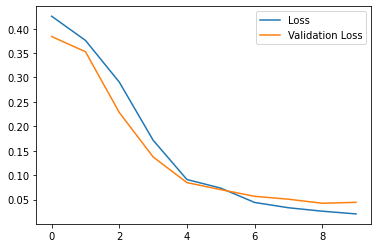

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

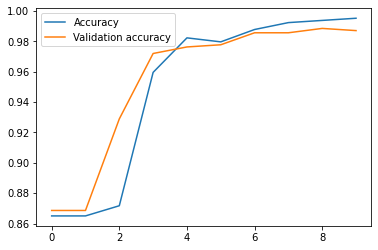

In [13]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()